**TITANIC SURVIVAL**
---
-----

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Machine Learning/Projects/Titanic Survival/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning/Projects/Titanic Survival/test .csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Let's see our data first**


---



In [ ]:
# checking shape of training and testing data 
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
# numerical columns and object based columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# no. of uniques in every feature
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Categorical Features**
 
 Survived - This is the target variable 
 
 Pclass - It tells about Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
  
  Sex - Gender of the passenger 
  
  Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
  
  Parch - The "Parch" column in the dataset refers to the number of parents or children each passenger had on board the ship.

In [ ]:
# null values in training data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# null values in testing data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# checking corelation with target column
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


---
**EDA**


*   Univariate Analysis 

Text(0.5, 0, 'SibSp')

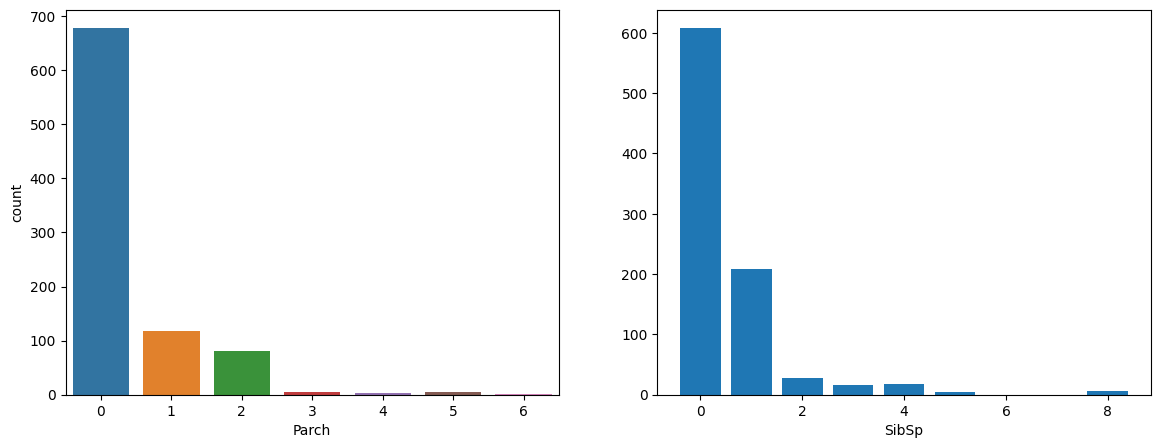

In [ ]:
# how many SibSp were there on ship
# plotting a countplot for Parch column
fig = plt.figure(figsize=(14,5))
fig.add_subplot(121)
sns.countplot(data=train, x='Parch')

# plotting a barplot for SibSp column
fig.add_subplot(122)
SibSp_counts = train['SibSp'].value_counts()
plt.bar(SibSp_counts.index, height=SibSp_counts.values)
plt.xlabel('SibSp')

From above plot we can say that most peoples on the ship were single's and couple's.


---



([<matplotlib.patches.Wedge at 0x7fa586218130>,
 [Text(-0.17571616709359641, 1.0858746836637898, '1st Class'),
  Text(-0.5160762002061153, -0.9714243951954356, '2nd Class'),
  Text(0.8765111456658484, -0.6646263698677192, '3rd Class')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

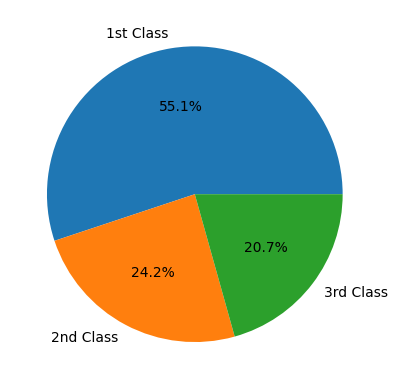

In [ ]:
# piechart for Passenger classe
labels = ['1st Class', '2nd Class', '3rd Class']
plt.pie(train['Pclass'].value_counts(), labels=labels, autopct='%1.1f%%')

See 55% people were from first class.

---



<Axes: xlabel='Age', ylabel='Count'>

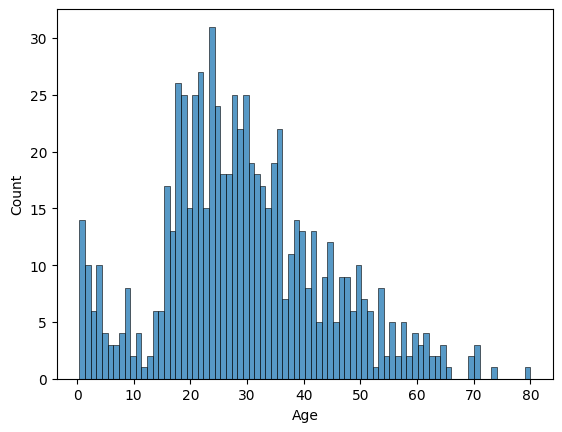

In [ ]:
# plotting age column on histplot
sns.histplot(train['Age'], bins=80)

Most of the passengers age lies in between 15 to 40. 


---



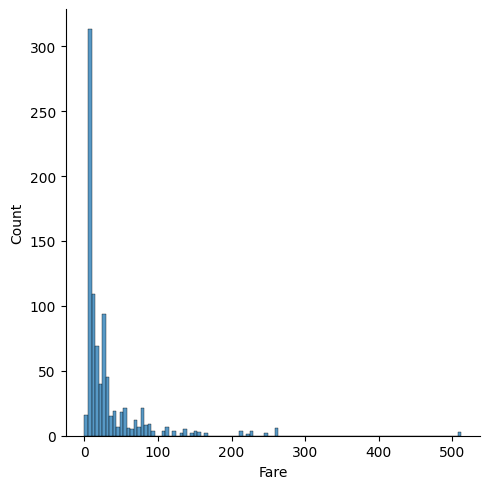

In [ ]:
sns.displot(x=train['Fare'])

Most of the passengers expenses were in between 0 to 50.

<Axes: xlabel='Survived', ylabel='count'>

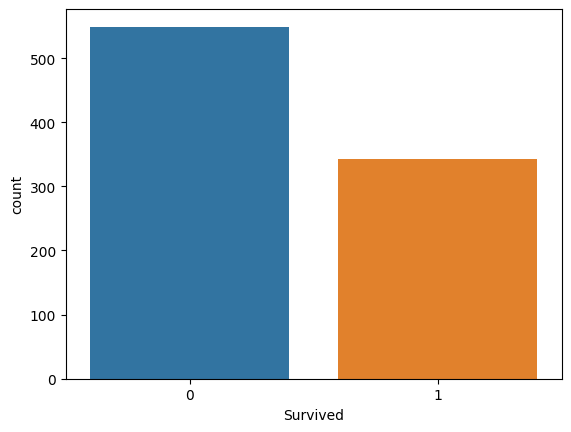

In [ ]:
# survived and not survived
sns.countplot(x=train['Survived'])



---


*  Bivariate Analysis

<Axes: xlabel='Fare', ylabel='Age'>

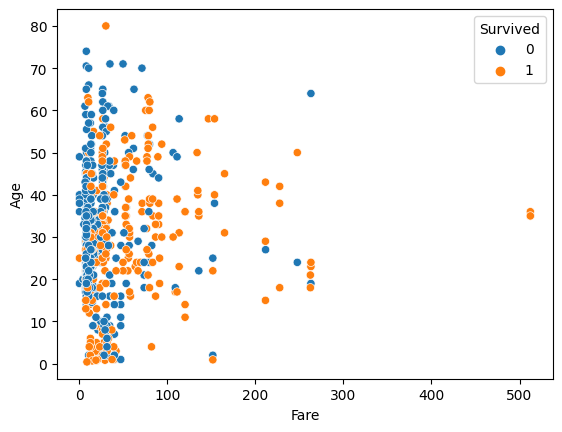

In [ ]:
sns.scatterplot(data=train, x=train['Fare'], y=train['Age'], hue='Survived')

If we compare age and Fare column on the basis of Survived we can say that those who have more expenses, survival rate of them is much more compare to those who were not spending money.


---



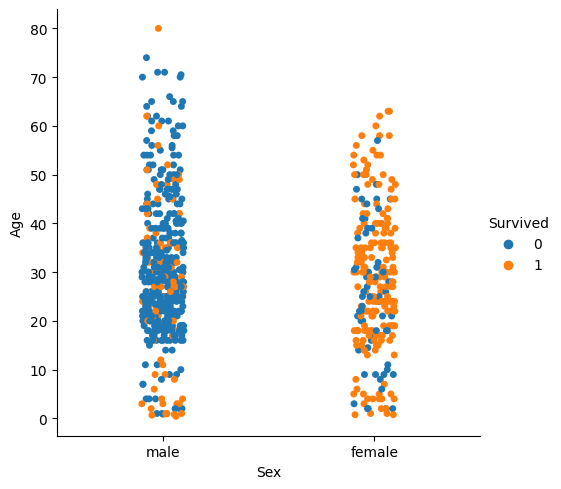

In [ ]:
sns.catplot(data=train, x='Sex', y='Age', hue='Survived')

As from above catplot the females number of survival was more compare to male and Age doesn't have anything related to survival.


---



<Axes: xlabel='Familysize', ylabel='Age'>

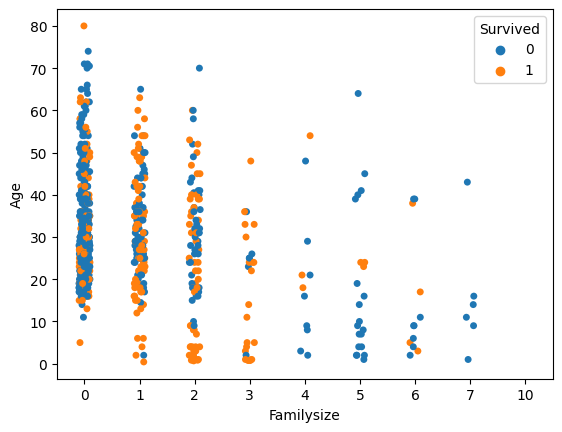

In [ ]:
train['Familysize'] = train['Parch'] + train['SibSp']
sns.stripplot(data=train, x=train['Familysize'], y='Age', hue='Survived')

Stripplot says those who were alone on the ship were have less survival rate and those who were in couple and in family with 2 to 3 people have more rate of survival.


---



<Axes: xlabel='Pclass', ylabel='Fare'>

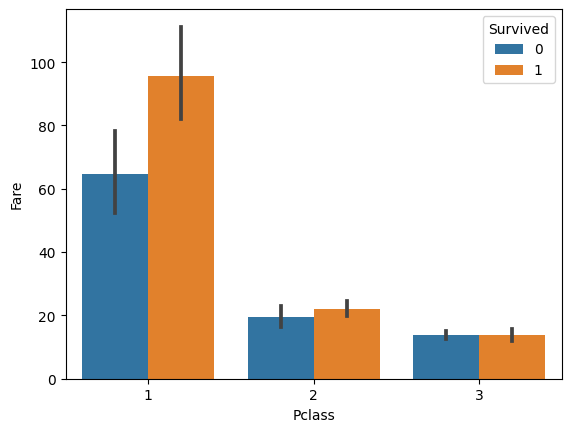

In [ ]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

As shown those who were in first class, there expenses were more and there number of survival is much much more compared to those people who have less expenses.


---




*   **Data cleaning and preprocessing on training and testing data**

**Handling Missing Data**

In [ ]:
# in training data Embarked column have only 2 null values and in testing data Fare column have only 1 null value so dropping them would be best
train.dropna(subset=['Embarked'], inplace=True)
test.dropna(subset=['Fare'], inplace=True)

In [ ]:
# filling null values from Age column
train.fillna(train['Age'].median(), inplace=True)
test.fillna(test['Age'].median(), inplace=True)


---
**Handling Outliers**

In [ ]:
# creating a new variable containing only numerical columns
train_num = train[['Age','Fare']]
test_num = test[['Age','Fare']]

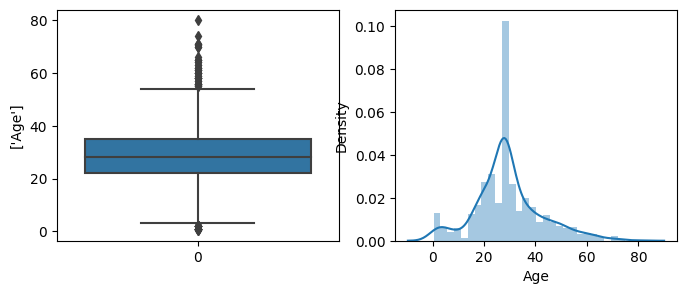

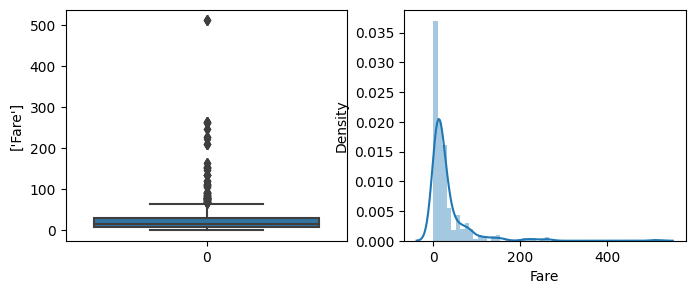

In [ ]:
for col in train_num.columns:
  fig = plt.figure(figsize=(8,3))
  fig.add_subplot(121)
  plt.ylabel([col])
  sns.boxplot(train_num[col])

  fig.add_subplot(122)
  sns.distplot(train_num[col])

In [ ]:
# how many passengers were survived above the age of 65
train[train['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,28.0,S,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,28.0,Q,0
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,28.0,C,0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,28.0,S,0
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,28.0,S,0


From Above data we can see that passenger above age of 65 has not survived(only 1 survived). So considering them as outlier and removing them can be loss of information. 

In [ ]:
# how many passengers have survived or not survived above the fare of 100
print('Survived:', train[(train['Fare'] > 100) & (train['Survived'] == 1)].shape[0])
print('Not Survived:', train[(train['Fare'] > 100) & (train['Survived'] == 0)].shape[0])

Survived: 39
Not Survived: 14


In [ ]:
# dropping the value above 500 from fare column(Considering them as ouliers) from both training and testing data
train = train.drop(train[train['Fare'] > 500].index)
test = test.drop(test[test['Fare'] > 500].index)

In [ ]:
# there is 1 passenger with age of 80 considerng him as a outlier and dropping it
train = train.drop(train[train['Age'] > 75].index)

As SibSp and Parch have only few categories so there is no point of removing outlier's of these columns.

---


*   **Feature Engineering**


*   ****

In [ ]:
# removing all unwanted column
# Name, PassengerId and Ticket column does not have anything to do with survival
# Cabin columns have almost 60% null values so dropping it would be great
train = train.drop(columns=['Name','Ticket','Cabin','PassengerId','Familysize'])
test = test.drop(columns=['Name','Ticket','Cabin','PassengerId'])

**Encoding data columns**

In [ ]:
# Encoding the sex column and Embarked column using OneHotEncoder
ohe = OneHotEncoder( sparse=False)
train1 = ohe.fit_transform(train[['Sex','Embarked']])
test1 = ohe.transform(test[['Sex','Embarked']])

In [ ]:
# resetting the indexes of training and testing data
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
# creating a new dataframe with with encoded data and original dataframe
new_train = pd.concat([train, pd.DataFrame(train1, columns=[ 'female','male', 'Embarked_C', 'Embarked_D','Embarked_S'])], axis=1)
new_test = pd.concat([test, pd.DataFrame(test1, columns=[ 'female','male', 'Embarked_C', 'Embarked_D','Embarked_S'])], axis=1)

In [ ]:
# removing original Sex and Embarked column
new_train = new_train.drop(columns=['Sex','Embarked','male'])
new_test = new_test.drop(columns=['Sex','Embarked','male'])

**Splitting and Standardization**

In [ ]:
# splitting the dataset into x and y
X = new_train.iloc[:,1:]
y = new_train.Survived

In [ ]:
# applying train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# standardizing the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


---
**Training the model**

In [ ]:
# creating a logistic regression model
model = LogisticRegression(penalty='l2', solver='sag', max_iter=1500, random_state=11)

# fitting the model to training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=11, solver='sag')

In [ ]:
# pridiction
y_pred = model.predict(X_test)

In [ ]:
# accuracy score of training data
model.score(X_train, y_train)

0.7996768982229402

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8195488721804511


In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[157  14]
 [ 34  61]]


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[88 15]
 [25 49]]


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       171
           1       0.81      0.64      0.72        95

    accuracy                           0.82       266
   macro avg       0.82      0.78      0.79       266
weighted avg       0.82      0.82      0.81       266



---
**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# creating a KFold object
kf = KFold(n_splits=5)

In [ ]:
# fitting KFold to training and testing data
scores = cross_val_score(model, X, y, cv=kf)

In [ ]:
print(scores)

[0.80225989 0.79661017 0.7740113  0.75141243 0.82485876]


In [ ]:
# how much accuracy we are getting for 5 different train test split
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.05)


-----
**ROC - AUC curve**

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()